I am Li Jianwei and I haven't been good at sports since I was young. Basketball has always been the object of my fear. I only watch the stars working hard on the basketball court every time on TV, but I never dare to really touch basketball. I have to say, Kobe is the one who really summoned my courage. He taught me to persevere and never give up. In 2013, he ruptured his Achilles tendon in a game against the Warriors, gritted his teeth and insisted on making two free throws. I admire Kobe very much, and my friend Yi Zhang also like basketball, so we took this opportunity to choose Kobe's statistics.

The data set analysis goals:

-Read Kobe's career data set

-Exploratory analysis of the data set

-Establish an integrated algorithm model

-Model tuning, select the best model parameters

-Make predictions on the test set

### In my impression, Kobe is a very comprehensive player. So I assume that regardless of the 2-pointer or the 3-pointer, Kobe’s shooting percentage is very high, it should be about 30%. At the same time, Kobe is better at scoring at the basket, which means that his scoring position is more concentrated in the basket.

# The capstone project - Kobe's career data

# Author： Li Jianwei  and Yi Zhang

# 1.Read data set

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [13]:
url="https://raw.githubusercontent.com/lijianwei2465/kobe-data/master/kobe_data.csv"
raw=pd.read_csv(url,header=None)
raw.head()
                    #raw = pd.read_csv('C:\\Users\\Li Jianwei\\Desktop\\kobe_data.csv')
                    #raw.head()
#This data is from kaggle. It is public and only provides API. So I uploaded it to my github at the same time. Now we can use the code to download this data set.
#https://www.kaggle.com/kwak914/kobe-data
#This data is very rich and contains a variety of data​.Such as action type, shot type,  location when you shot, minutes , team id and so on. 


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [14]:
raw.shape

(30697, 25)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

#  It can be seen from the above results that there are 25 features in the data set, of which 24 features are complete, and only the feature shot_made_flag has missing values. So next we will divide the data set into two parts, the data set containing shot_made_flag is used as the training set, and indeed the data set of shot_made_flag is used as the test set. Predict the shot_made_flag value on the test set by modeling the training set.

In [16]:
raw.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
action_type,30697,57,Jump Shot,18880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
combined_shot_type,30697,6,Jump Shot,23485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_event_id,30697,NaN,NaN,NaN,249.191,150.004,2,110,253,368,659
game_id,30697,NaN,NaN,NaN,2.47641e+07,7.75517e+06,2e+07,2.05001e+07,2.09004e+07,2.96005e+07,4.99001e+07
lat,30697,NaN,NaN,NaN,33.9532,0.0877914,33.2533,33.8843,33.9703,34.0403,34.0883
loc_x,30697,NaN,NaN,NaN,7.1105,110.125,-250,-68,0,95,248
loc_y,30697,NaN,NaN,NaN,91.1075,87.7914,-44,4,74,160,791
lon,30697,NaN,NaN,NaN,-118.263,0.110125,-118.52,-118.338,-118.27,-118.175,-118.022
minutes_remaining,30697,NaN,NaN,NaN,4.88562,3.4499,0,2,5,8,11
period,30697,NaN,NaN,NaN,2.51943,1.15367,1,1,3,3,7


# 2.Data exploratory analysis

In [17]:
plt.rcParams['axes.unicode_minus']=False

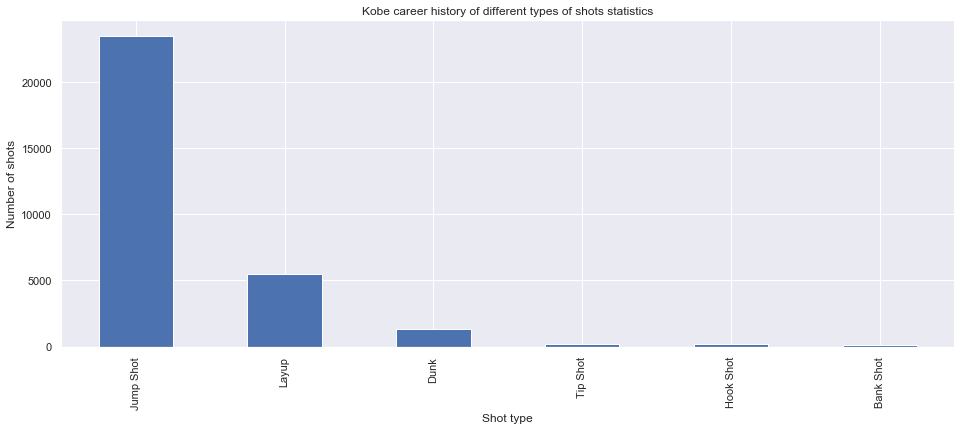

In [18]:
#View the distribution of Kobe's shot types
plt.figure(figsize = (16,6))
raw['combined_shot_type'].value_counts().plot(kind = 'bar')
plt.xlabel('Shot type');plt.ylabel('Number of shots');plt.title('Kobe career history of different types of shots statistics')
plt.show()

#  As can be seen from the above picture, Kobe's favorite offense is a jumper, followed by a layup.

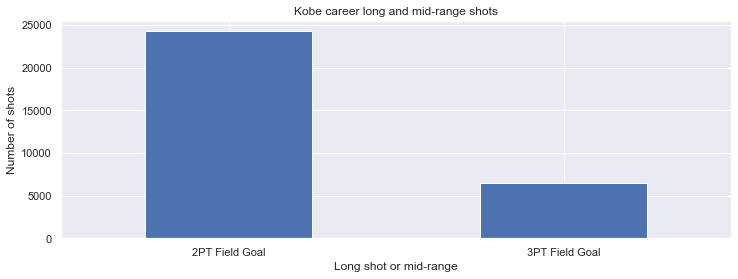

In [19]:
#View Kobe's two-pointers and three-pointers shots
plt.figure(figsize = (12,4))
raw['shot_type'].value_counts().plot(kind = 'bar')
plt.xlabel('Long shot or mid-range');plt.ylabel('Number of shots');plt.title('Kobe career long and mid-range shots')
plt.xticks(rotation = 0)
plt.show()

# As can be seen from the above figure, Kobe's offensive methods are mainly mid-range offenses, such as emergency stop jumpers, rollover jumpers, dry pull jumpers, etc.

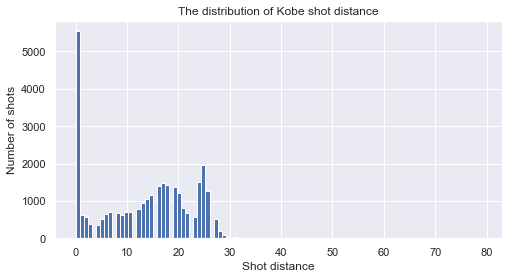

In [20]:
#View the distribution of Kobe's shot distance
plt.figure(figsize = (8,4))
raw['shot_distance'].hist(bins = 100)
plt.xlabel('Shot distance');plt.ylabel('Number of shots');plt.title('The distribution of Kobe shot distance')
plt.show()

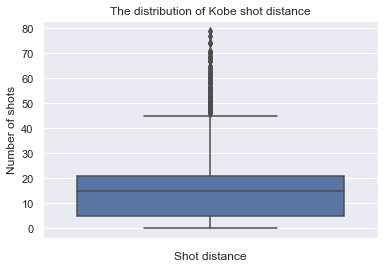

In [21]:
plt.figure(figsize = (6,4))
sns.boxplot(data = raw,y = 'shot_distance')
plt.xlabel('Shot distance');plt.ylabel('Number of shots');plt.title('The distribution of Kobe shot distance')
plt.show()

# We can find that Kobe takes the most shots at the basket, about 6000 times. About 75% of his shots are 2-pointers and 25% of 3-pointers.

Text(0.5, 1.0, 'shot_zone_range')

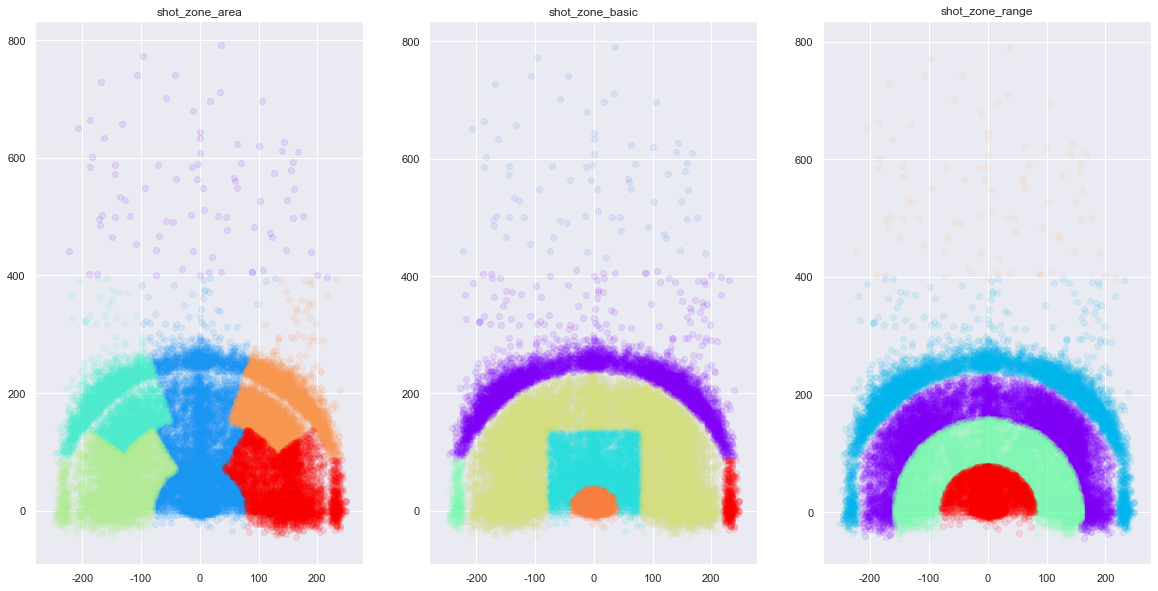

In [22]:
#Visualize the shot area of Kobe, and divide the shot area according to different standards
import matplotlib.cm as cm
plt.figure(figsize  = (20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = raw.groupby(feat)
    cs = cm.rainbow(np.linspace(0,1,len(gs)))
    for g,c in zip(gs,cs):
        plt.scatter(g[1].loc_x,g[1].loc_y,color = c,alpha = alpha)
        
plt.subplot(1,3,1)
scatter_plot_by_category(raw['shot_zone_area'])
plt.title('shot_zone_area')

plt.subplot(1,3,2)
scatter_plot_by_category(raw['shot_zone_basic'])
plt.title('shot_zone_basic')

plt.subplot(1,3,3)
scatter_plot_by_category(raw['shot_zone_range'])
plt.title('shot_zone_range')

In [23]:
raw['shot_distance'].describe()

count    30697.000000
mean        13.437437
std          9.374189
min          0.000000
25%          5.000000
50%         15.000000
75%         21.000000
max         79.000000
Name: shot_distance, dtype: float64

In [24]:
#Bring up the non-empty data set of shot_made_falg, which is our training set
kobe = raw[pd.notnull(raw['shot_made_flag'])]
print(kobe.shape)

(25697, 25)


In [25]:
kobe['shot_made_flag'] = kobe['shot_made_flag'].astype(np.object)

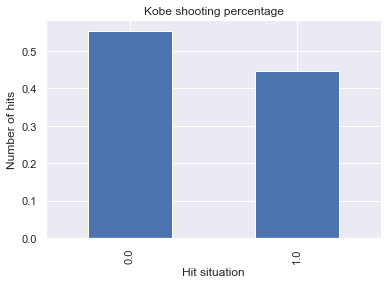

In [26]:
#Check Kobe's shooting percentage
plt.figure(figsize = (6,4))
kobe['shot_made_flag'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel('Hit situation');plt.ylabel('Number of hits');plt.title('Kobe shooting percentage')
plt.show()

# What we need to pay attention to is that this sample is only a partial sample of the entire data set, and cannot reflect the true hit rate of his career.

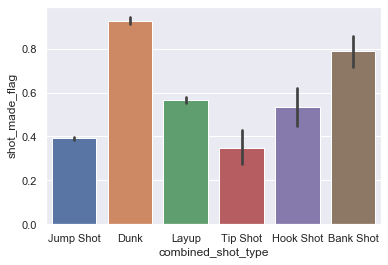

In [27]:
#Observe the relationship between different shot types and hit rate

sns.barplot(data = kobe,x = 'combined_shot_type',y = 'shot_made_flag')

# As can be seen from the above figure, the hit rate from high to low is as follows: dunk-scratch-layup-hook-jumper-tipping

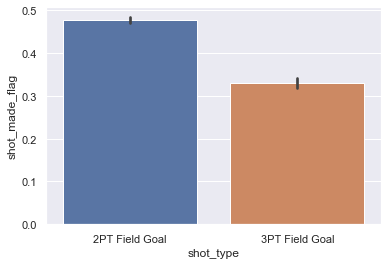

In [28]:
#Observe the percentage of two-pointers and three-pointers

sns.barplot(data = kobe,x = 'shot_type',y = 'shot_made_flag')

In [29]:
kobe.groupby('shot_type')['shot_made_flag'].value_counts(normalize = True)

shot_type       shot_made_flag
2PT Field Goal  0.0               0.522652
                1.0               0.477348
3PT Field Goal  0.0               0.670732
                1.0               0.329268
Name: shot_made_flag, dtype: float64

# From the above results, it can be seen that Kobe's two-pointer shooting rate is 47.7%, and his three-pointer shooting rate is 32.9%.

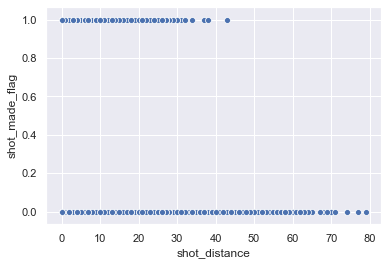

In [30]:
#Observe the relationship between shot distance and hit rate
sns.scatterplot(data = kobe, x = 'shot_distance',y = 'shot_made_flag' )

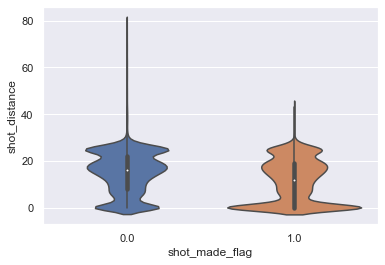

In [31]:
sns.violinplot(data = kobe, y = 'shot_distance',x = 'shot_made_flag' )

# We can conclude that the longer the shot distance, the lower the hit rate, and no shots over 43 feet were hit.

# 3.Data preprocessing

In [32]:
raw.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [33]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [34]:
#Delete id features that have no effect on the final prediction result

drop_ids = ['game_event_id','game_id','team_id','shot_id']
for feature in drop_ids:
    raw = raw.drop(feature,axis = 1)

In [35]:
#Create a new feature time_remaining to replace minutes_remaining and seconds_remaining

raw['time_remaining'] = raw['minutes_remaining']*60 + raw['seconds_remaining']

In [36]:
#Remove the minutes_remaining and seconds_remaining features

raw = raw.drop(['minutes_remaining','seconds_remaining'],axis = 1)

In [37]:
raw['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [38]:
#Process season data into a more simple and understandable format
raw['season'] = raw['season'].apply(lambda x:int(x.split('-')[1]))
raw['season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0], dtype=int64)

In [39]:
#lat, lon, loc_x, loc_y express the same meaning, delete the lat, lon feature
raw = raw.drop(['lat','lon'],axis = 1)

In [40]:
#Action_type and combined_shot_type have similar meanings, delete action_type
raw = raw.drop(['action_type'],axis = 1)

In [41]:
#shot_zone_area, shot_zone_basic, shot_zone_range also express the same meaning, just keep one
raw = raw.drop(['shot_zone_basic','shot_zone_range'],axis = 1)

In [42]:
#team_name and game_date have no effect on the final prediction result, delete these two features
raw = raw.drop(['team_name','game_date'],axis = 1)

In [43]:
#matchup and opponent express the same meaning, just keep opponent
raw = raw.drop('matchup',axis = 1)

In [44]:
#View the information of the current data set
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   combined_shot_type  30697 non-null  object 
 1   loc_x               30697 non-null  int64  
 2   loc_y               30697 non-null  int64  
 3   period              30697 non-null  int64  
 4   playoffs            30697 non-null  int64  
 5   season              30697 non-null  int64  
 6   shot_distance       30697 non-null  int64  
 7   shot_made_flag      25697 non-null  float64
 8   shot_type           30697 non-null  object 
 9   shot_zone_area      30697 non-null  object 
 10  opponent            30697 non-null  object 
 11  time_remaining      30697 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 2.8+ MB


# Among them, combined_shot_type, shot_type, shot_zone_area, and opponent are object types, and one_hot_enncoding is used for these features.

In [45]:
raw = pd.get_dummies(raw)
raw.head()

,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,time_remaining,combined_shot_type_Bank Shot,combined_shot_type_Dunk,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,167,72,1,0,1,18,NaN,627,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-157,0,1,0,1,15,0.0,622,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-101,135,1,0,1,16,1.0,465,0,0,...,0,0,1,0,0,0,0,0,0,0
3,138,175,1,0,1,22,0.0,412,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2,0,1,0,1.0,379,0,1,...,0,0,1,0,0,0,0,0,0,0


In [46]:
raw.shape

(30697, 55)

In [47]:
#Divide the data set into training set and test set

train_data = raw[pd.notnull(raw['shot_made_flag'])]
test_data = raw[pd.isnull(raw['shot_made_flag'])]

print('Training set size:',train_data.shape)
print('The size of the test set:',test_data.shape)

Training set size: (25697, 55)
The size of the test set: (5000, 55)


# Since the test set has no labels, we need to divide the training set into training samples and verification samples by cross-validation, and use the verification set to evaluate the quality of the model. Finally select the best model and make predictions on the test sample

In [48]:

train_labels = train_data['shot_made_flag']
train_features = train_data.drop('shot_made_flag',axis = 1)

test_features = test_data.drop('shot_made_flag',axis = 1)

# 4.Build a random forest model

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

#initialization
RFC = RandomForestClassifier()

#Use grid search gridsearchcv to find the best model parameters
param_grid = {'n_estimators':[40,80,120,160,200],
             'max_depth':[3,4,5,6,7,8,9,10],
             'min_samples_split':[3,4,5,6,7]}
grid = GridSearchCV(RFC,param_grid = param_grid,cv = 5,verbose = 2,n_jobs = -1)
t1 = time.time()
grid.fit(train_features,train_labels)
t2 = time.time()
print('Model training time{}'.format(t2 - t1))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.3min finished


Model training time197.84387063980103


In [50]:
#the best model parameters
grid.best_params_

{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 40}

In [51]:
best_model = grid.best_estimator_

In [52]:
test_flag = best_model.predict(test_features)

In [53]:
print(test_flag[:10])

[0. 0. 1. 1. 0. 0. 1. 1. 1. 0.]


In [54]:
test_data['shot_made_flag'] = test_flag

In [55]:
#Save
test_data.to_csv('kobe_prediction.csv')

# This is the whole content of our homework.

Our Kobe career data set is credible and can be found on the official kaggle website, and there are also codes that can be downloaded from the github website.
The Kobe data set contains very rich content, showing Kobe's career data from the shooting method, shooting distance, scoring method, number of points, shooting position and other aspects.

We cleaned up data many times, and first deleted a lot of useless data, which made our final model prediction speed significantly faster. We have 25 features, but only 24 are available. All we removed the missing data and deleted id features that have no effect on the final prediction result. At the same time, we created a new feature time_remaining to replace minutes_remaining and seconds_remaining . In addition, we also process the data into a more simple and understandable format.

We successfully visualized the data to view the distribution of Kobe's shot types; view the number of Kobe's two-pointers and three-pointers; histogram and box chart to view the distribution of Kobe's shot distance; scatter plot to visualize Kobe's shot area, follow The shooting area divided by different standards; check Kobe's shooting percentage; observe the relationship between different shooting types and shooting percentage; observe the two-pointer and three-point shooting percentage; observe the relationship between the shooting distance and the shooting percentage.

The visualization supports my hypothesis, which can be seen at the beginning. Kobe's favorite offense is a jumper, followed by a layup. Kobe's offensive methods are mainly mid-range offenses, such as the familiar emergency stop jumpers, rollover jumpers, and dry pull jumpers. Kobe takes the most shots at the basket, about 6000 times, about 75% of his shots are 2-pointers and 25% of 3-pointers. The hit rate from high to low is as follows: dunk-scratch-layup-hook-jumper-tipping. Kobe made 47.7% of his two-pointers and 32.9% of his three-pointers. We can find that the data and visualization basically support my hypothesis that Kobe is a very accurate shooter, and he is also very versatile without any obvious shortcomings. Kobe's shooting percentage is about 44%, which is beyond my prediction. But through analysis, we can find that the sample is only a part of the sample in the data set, so the result obtained is not accurate enough.

Kobe is a great player, so we want to predict what his statistics will look like if Kobe can still fight on the basketball court. Therefore, we use the random forest model to divide the training set into training samples and validation samples through cross-validation, and use the validation set to evaluate the quality of the model. Choose the best model and make predictions on the test sample. From the final kobe_prediction.csv, we can find that Kobe's data is still very eye-catching, and Kobe deserves to be a great player.